In [2]:
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
import numpy as np
import h5py

In [5]:
data_path = "../../data/"

x_rainy = "../../data/2020-11-08_22.58.25.png"
y_rainy = "../../data/2020-11-08_22.58.35.png"

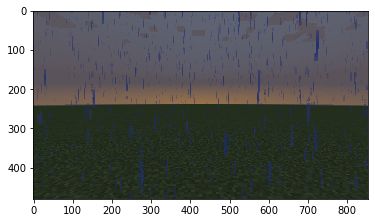

In [7]:
img = mpimg.imread(x_rainy)
plt.imshow(img)
plt.show()

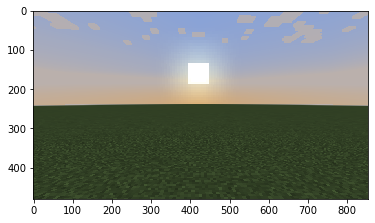

In [8]:
img = mpimg.imread(y_rainy)
plt.imshow(img)
plt.show()

In [12]:
image = Image.open(x_rainy)
image.size

(854, 480)

In [144]:
# Crops image file to a square with a centered pivot then resizes to width = height = size
def crop_and_resize(filename, size):
    img = cv2.imread(filename)
    if img.shape[1] > img.shape[0]:
        start_y = int(img.shape[1]/2 - img.shape[0]/2)
        end_y = start_y + img.shape[0]
        crop = img[0:img.shape[0], start_y:end_y]
    else: 
        start_x = int(img.shape[0]/2 - img.shape[1]/2)
        end_x = start_x + img.shape[1]
        crop = img[start_x:end_x, 0:img.shape[1]]
    resized =  cv2.resize(crop, (size, size))
    resized[:, :, [2, 0]] = resized[:, :, [0, 2]] 
    return resized

# TO USE: img.getpixel((x,y)) for rgb at x,y
def rgb(cv2_image):
    cvtcolor = cv2.cvtColor(cv2_image, cv2.COLOR_BGR2RGB)
    img = Image.fromarray(cvtcolor)
    return img.convert("RGB")

<class 'numpy.ndarray'>


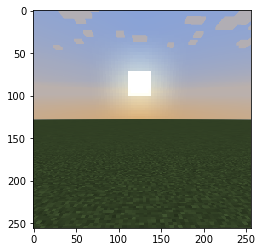

In [145]:
img = crop_and_resize(y_rainy, 256)

print(type(img))

plt.imshow(img)
plt.show()

In [74]:
k = cv2.imread(x_rainy)

imgs = np.expand_dims(cv2.imread(os.path.join(data_path, '2020-11-08_22.58.25.png')), axis=0)
print(imgs.shape)

count = 0
for f in os.listdir(data_path):
    if f != '2020-11-08_22.58.25.png':
        imgs = np.append(imgs, np.expand_dims(cv2.imread(os.path.join(data_path, f)), axis=0))
        print(imgs.shape)
        sys.exit()

(1, 480, 854, 3)
(2459520,)


SystemExit: 

In [51]:
imgs.shape

(0,)

In [65]:
np.empty((1, 854, 480, 3))

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]])

In [147]:
import glob
image_list = []
count = 0
max_count = 1900
for filename in glob.glob(data_path + '*.png'):
#     if count < max_count:
#         img = cv2.imread(filename)
#         image_list.append(img)
#         print(count)
#         count += 1

    if count < 258 or count > 313:
        img = cv2.imread(filename)
        image_list.append(img)

#     if count == 314:
#         img = mpimg.imread(filename)
#         plt.imshow(img)
#         plt.show()
#         img = cv2.imread(filename)
#         print(img.shape)
#         sys.exit()
    count += 1

In [148]:
imgs = np.stack(image_list, axis=0 )

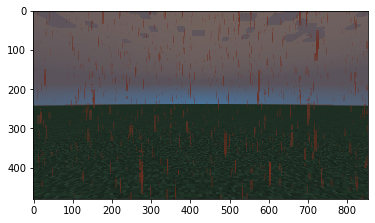

SystemExit: 

In [152]:
for i in imgs:
    plt.imshow(i)
    plt.show()
    sys.exit()

In [161]:
# Crops image file to a square with a centered pivot then resizes to width = height = size
def crop_and_resize2(img, size):
    if img.shape[1] > img.shape[0]:
        start_y = int(img.shape[1]/2 - img.shape[0]/2)
        end_y = start_y + img.shape[0]
        crop = img[0:img.shape[0], start_y:end_y]
    else: 
        start_x = int(img.shape[0]/2 - img.shape[1]/2)
        end_x = start_x + img.shape[1]
        crop = img[start_x:end_x, 0:img.shape[1]]
    resized =  cv2.resize(crop, (size, size))
    resized[:, :, [2, 0]] = resized[:, :, [0, 2]] 
    return resized


image_list2 = []
for i in imgs:
    resized = crop_and_resize2(i, 256)
    image_list2.append(resized)

In [162]:
imgs2 = np.stack(image_list2, axis=0 )

In [163]:
imgs2.shape

(1948, 256, 256, 3)

In [170]:
data_filtered = imgs2[:1900]

(1900, 256, 256, 3)

In [178]:
data_filtered.shape

(1900, 256, 256, 3)

In [182]:
data_filt1 = []
data_filt2 = []

count = 0
for i in data_filtered:
    if count%2 == 0:
        data_filt1.append(i)
    else:
        data_filt2.append(i)
    count += 1

In [183]:
data_filt1 = np.stack(data_filt1, axis=0 )
data_filt2 = np.stack(data_filt2, axis=0 )

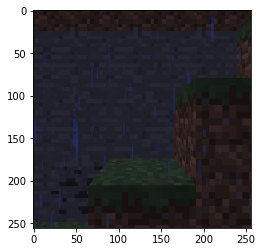

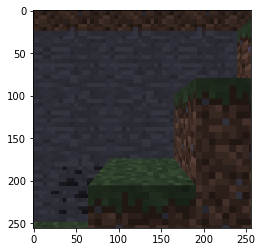

In [191]:
i = 949
plt.imshow(data_filt1[i])
plt.show()

plt.imshow(data_filt2[i])
plt.show()

(950, 3, 256, 256)


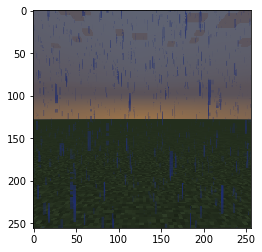

In [203]:
# transpose testing
k = data_filt1.copy()
k1 = k.transpose((0, 3, 1, 2))
print(k1.shape)

plt.imshow(k1.transpose((0, 2, 3, 1))[0])
plt.show()

In [205]:
data_filter1 = data_filt1.transpose((0, 3, 1, 2))

data_filter2 = data_filt2.transpose((0, 3, 1, 2))
data_filter2.shape

(950, 3, 256, 256)

In [208]:
# save to h5py
with h5py.File('C:/Users/Kai/GitHub/Forever_Machine_Learning/code/data_950.h5', 'w') as hf:
    hf.create_dataset("x",  data=data_filter1)
    hf.create_dataset("y",  data=data_filter2)

In [209]:
# read from h5py
with h5py.File('C:/Users/Kai/GitHub/Forever_Machine_Learning/code/data_950.h5', 'r') as hf:
    data_x = hf['x'][:]
    data_y = hf['y'][:]

In [216]:
data_x.shape

(950, 3, 256, 256)

In [224]:
import time
from typing import List
import functools
import torch.nn as nn
import torch
from torch.utils.data import DataLoader
from torch.utils import data
import sys
import h5py

class Dataset(data.Dataset):
    def __init__(self, x, y=None):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, index):
        if self.y is None:
            return self.x[index]
        else:
            return self.x[index], self.y[index]

In [225]:
# 80/20 split
# data_tr, data_te = data_obs.split()
train_ind = int(len(data_x) * 0.8)
data_tr = Dataset(data_x[:train_ind], data_y[:train_ind])
data_te = Dataset(data_x[train_ind:], data_y[train_ind:])

train_loader = DataLoader(
    data_tr,
    batch_size=5,
    shuffle=True
)

train_losses = []

for epoch in range(5):
    start_time = time.time()

    epoch_loss = torch.tensor(0.0)

    for batch_idx, batch in enumerate(train_loader):

        data, target = batch
        
        outputs = self.model(data)

        loss = self.criterion(outputs, target)

        # Aggregate loss across mini-batches (per epoch)
        epoch_loss += loss

        # Backprop and perform Adam optimisation
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

    print(
        f"Epoch: {epoch}\tTrain Loss: {epoch_loss/len(train_loader):.5f}"
        f"\tTotal Time: {time.time() - start_time:.3f}"
    )

    train_losses.append(epoch_loss / len(train_loader))

torch.Size([5, 3, 256, 256])
torch.Size([5, 3, 256, 256])


SystemExit: 

c:\users\kai\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3327: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


### Converting between 255 rgb to 0~1 rgb and save

In [226]:
data_x.shape

(950, 3, 256, 256)

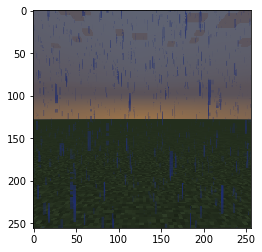

In [232]:
plt.imshow(data_x.transpose((0, 2, 3, 1))[0])
plt.show()

In [239]:
data_x2 = data_x/255
data_y2 = data_y/255

In [237]:
data_x2.shape

(950, 3, 256, 256)

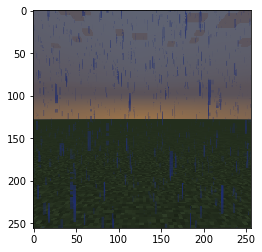

In [241]:
plt.imshow(data_x2.transpose((0, 2, 3, 1))[0])
plt.show()

In [242]:
# save to h5py
with h5py.File('C:/Users/Kai/GitHub/Forever_Machine_Learning/code/data_950_0to1.h5', 'w') as hf:
    hf.create_dataset("x",  data=data_x2)
    hf.create_dataset("y",  data=data_y2)
    
# read from h5py
with h5py.File('C:/Users/Kai/GitHub/Forever_Machine_Learning/code/data_950_0to1.h5', 'r') as hf:
    data_x3 = hf['x'][:]
    data_y3 = hf['y'][:]


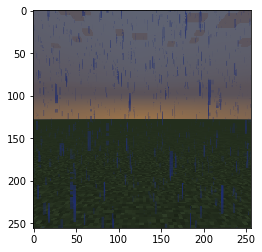

[[[[0.36862745 0.36862745 0.36862745 ... 0.3372549  0.36078431
    0.36078431]
   [0.36862745 0.36862745 0.36862745 ... 0.34117647 0.36078431
    0.36078431]
   [0.36862745 0.35686275 0.36862745 ... 0.36078431 0.36078431
    0.36078431]
   ...
   [0.14509804 0.1372549  0.1372549  ... 0.11764706 0.12156863
    0.1372549 ]
   [0.12941176 0.12941176 0.12941176 ... 0.11764706 0.11764706
    0.12156863]
   [0.1254902  0.1254902  0.1254902  ... 0.14509804 0.14509804
    0.14509804]]

  [[0.37647059 0.37647059 0.37647059 ... 0.32156863 0.3372549
    0.3372549 ]
   [0.37647059 0.37647059 0.37647059 ... 0.3254902  0.3372549
    0.3372549 ]
   [0.37647059 0.36470588 0.37647059 ... 0.3372549  0.3372549
    0.3372549 ]
   ...
   [0.18823529 0.18039216 0.18039216 ... 0.15294118 0.15686275
    0.18039216]
   [0.16862745 0.16862745 0.16862745 ... 0.15294118 0.15294118
    0.15686275]
   [0.16470588 0.16470588 0.16470588 ... 0.19215686 0.19215686
    0.19215686]]

  [[0.43137255 0.43137255 0.43137255 

In [245]:
plt.imshow(data_x3.transpose((0, 2, 3, 1))[0])
plt.show()

print(data_x3)

In [16]:
import datetime

# now = datetime.now()

# current_time = now.strftime("%H:%M:%S")
# print("Current Time =", current_time)

current_time = datetime.datetime.now() - datetime.timedelta(hours=8)
print(now.strftime("%H:%M:%S"))

08:06:16


In [19]:
import time
start_time = time.time()

time.sleep(10)

print(f"\tTotal Time: {(time.time() - start_time)/60:.3f} minutes")

	Total Time: 0.167 minutes


In [5]:
2e-3

0.002

In [28]:
# read from h5py
with h5py.File('C:/Users/Kai/GitHub/Forever_Machine_Learning/code/data_950_0to1.h5', 'r') as hf:
    data_x = hf['x'][:]
    data_y = hf['y'][:]

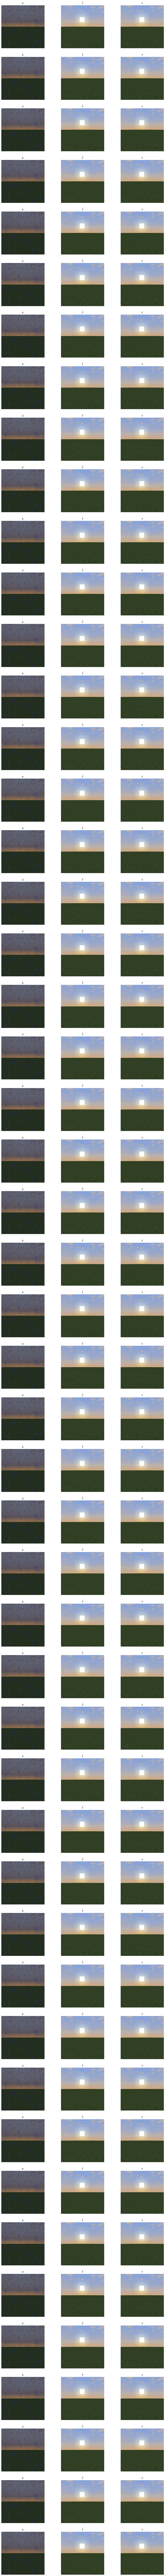

In [75]:
kx = data_x.transpose((0, 2, 3, 1))[0]
ky = data_y.transpose((0, 2, 3, 1))[0]

ind = 50
fig, ax = plt.subplots(ind, 3, figsize=(16, 250))

for x in range(ind):
    ax[x][0].axis('off')
    ax[x][0].set_title('$X$')
    ax[x][0].imshow(kx)
    ax[x][1].axis('off')
    ax[x][1].set_title('$\hat{Y}$')
    ax[x][1].imshow(ky)
    ax[x][2].axis('off')
    ax[x][2].set_title('$Y$')
    ax[x][2].imshow(ky)


# plt.imshow(data_x.transpose((0, 2, 3, 1))[0])
# plt.show()

# plt.tight_layout()

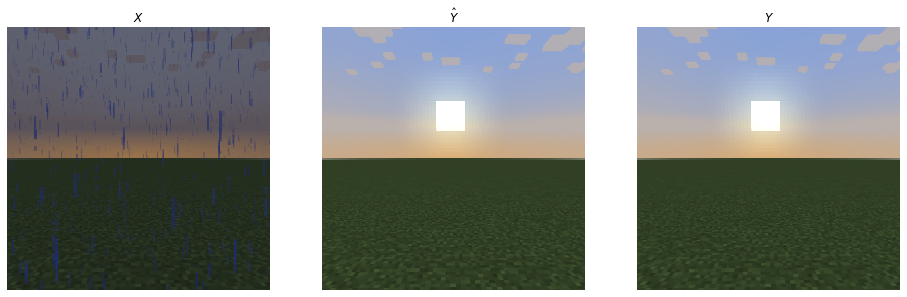

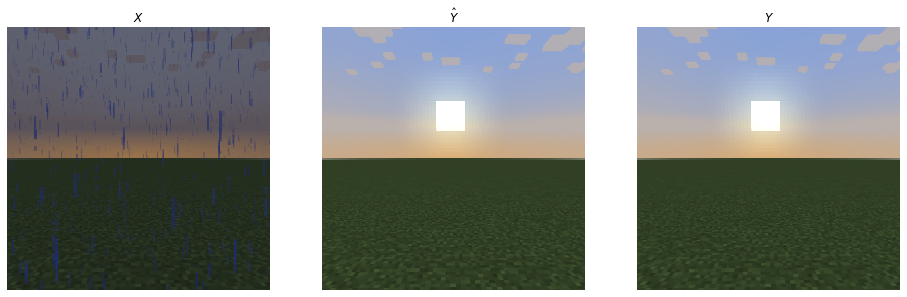

In [78]:
kx = data_x.transpose((0, 2, 3, 1))[0]
ky = data_y.transpose((0, 2, 3, 1))[0]

fig, ax = plt.subplots(1, 3, figsize=(16, 5))

ax[0].axis('off')
ax[0].set_title('$X$')
ax[0].imshow(kx)
ax[1].axis('off')
ax[1].set_title('$\hat{Y}$')
ax[1].imshow(ky)
ax[2].axis('off')
ax[2].set_title('$Y$')
ax[2].imshow(ky)

fig, ax = plt.subplots(1, 3, figsize=(16, 5))

ax[0].axis('off')
ax[0].set_title('$X$')
ax[0].imshow(kx)
ax[1].axis('off')
ax[1].set_title('$\hat{Y}$')
ax[1].imshow(ky)
ax[2].axis('off')
ax[2].set_title('$Y$')
ax[2].imshow(ky)

# plt.imshow(data_x.transpose((0, 2, 3, 1))[0])
# plt.show()

# plt.tight_layout()

### Peak Signal to Noise Ratio

(3, 256, 256)


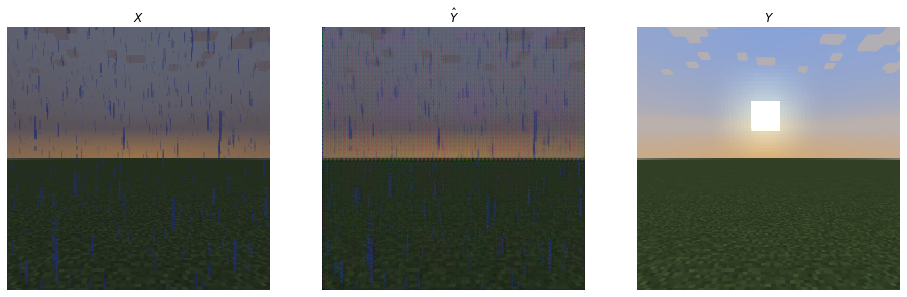

In [9]:
ind = 0

with h5py.File('C:/Users/Kai/GitHub/Forever_Machine_Learning/code/data_950_0to1_blur.h5', 'r') as hf:
    x = hf['x'][ind]
    x_blur = hf['x_blur'][ind]
    y = hf['y'][ind]

fig, ax = plt.subplots(1, 3, figsize=(16, 5))

print(x.shape)

ax[0].axis('off')
ax[0].set_title('$X$')
ax[0].imshow(x.transpose((1, 2, 0)))
ax[1].axis('off')
ax[1].set_title('$\hat{Y}$')
ax[1].imshow(x_blur.transpose((1, 2, 0)))
ax[2].axis('off')
ax[2].set_title('$Y$')
ax[2].imshow(y.transpose((1, 2, 0)))

In [10]:
import cv2
img1 = cv2.imread('img1.bmp')
img2 = cv2.imread('img2.bmp')
psnr = cv2.PSNR(x, x_blur)

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-nxx381if\opencv\modules\core\src\norm.cpp:1293: error: (-215:Assertion failed) _src1.type() == _src2.type() in function 'cv::PSNR'


In [39]:
from math import log10, sqrt 
import cv2 
import numpy as np 

# reference: https://www.geeksforgeeks.org/python-peak-signal-to-noise-ratio-psnr/
def psnr(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 1.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr, mse 

In [45]:
psnr(x, x_blur)

(32.89258839193898, 0.0005137373732215734)

In [51]:
from skimage.metrics import structural_similarity as ssim

ssim(x.transpose((1, 2, 0)), x_blur.transpose((1, 2, 0)), data_range=1, multichannel=True)

0.7986635661647495

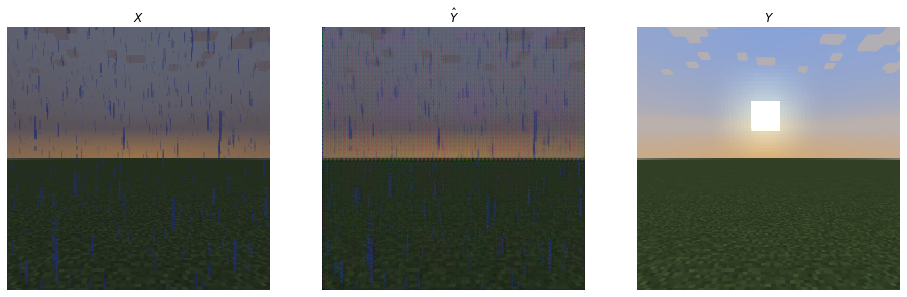

In [54]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))

ax[0].axis('off')
ax[0].set_title('$X$')
ax[0].imshow(x.transpose((1, 2, 0)))
ax[1].axis('off')
ax[1].set_title('$\hat{Y}$')
ax[1].imshow(x_blur.transpose((1, 2, 0)))
ax[2].axis('off')
ax[2].set_title('$Y$')
ax[2].imshow(y.transpose((1, 2, 0)))